# Standard Scaler

## *   Feature scaling is important in machine learning as it balances the scale of different features in a dataset, helping to ensure that each feature has equal influence on the results. 
## *   Standardization is a common method of feature scaling that transforms the values to have zero mean and unit variance. This helps algorithms that assume normally distributed data to perform well.



## StandardScaler is typically used when the features in a dataset have different scales, meaning that some features have much larger values than others. In such cases, using StandardScaler can help to normalize the features and bring them to a common scale, which can help improve the performance of many machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

## iloc
### It works by specifying the row and column numbers to access specific data elements in a DataFrame. It operates exclusively on integer-based indexing and not on label-based indexing, unlike loc.You can also use slicing to access a range of rows and/or columns. 

In [10]:
df = df.iloc[:,2:]

In [11]:
df.sample(5)

,Age,EstimatedSalary,Purchased
295,36,63000,0
334,57,60000,1
293,37,77000,0
306,51,134000,0
303,37,79000,1


## Train test split

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],test_size=0.3,
                                                    random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

## StandardScaler
### It is a pre-processing function in the scikit-learn library that is used to standardize the features of a dataset. It is used to transform the features by subtracting the mean and dividing by the standard deviation, so that the transformed features have a mean of 0 and a standard deviation of 1. This is a common pre-processing step in machine learning, as many algorithms assume that the features have zero mean and unit variance.


## Note
### Note that it's important to use the same StandardScaler to transform both the training and testing data, in order to ensure that the features have the same mean and standard deviation in both sets. To do this, you can fit the StandardScaler on the training data and then use the same scaler to transform the testing data.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# It will learn the parameter
# Learning on the basis of train data
scaler.fit(X_train)
# Transforming both the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [15]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [16]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [17]:
# Original Dataset
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [18]:
# Transformed Dataset
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


## After Scaling

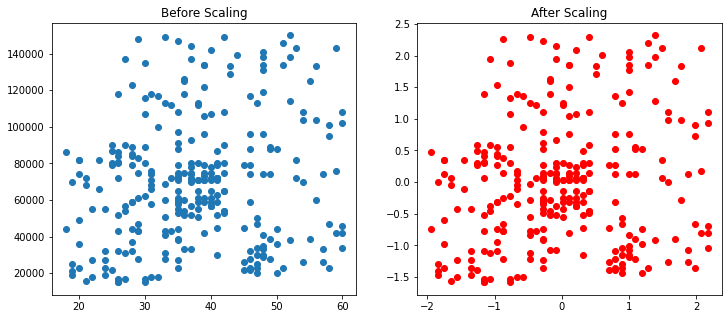

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))


ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

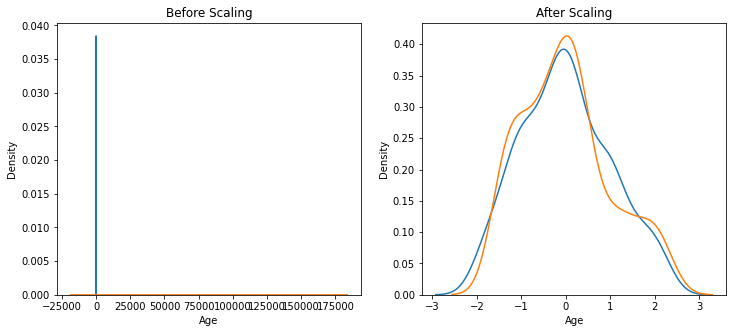

In [21]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

## Comparision of Distribution

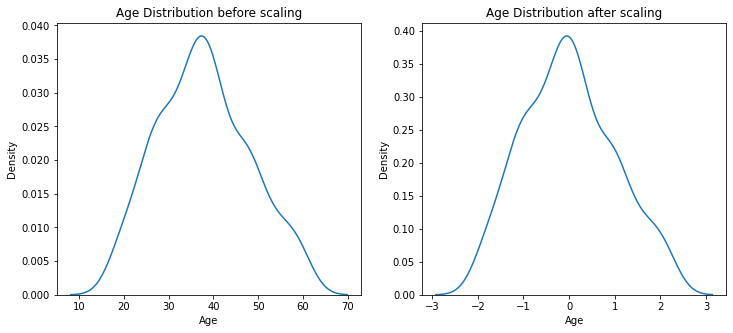

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Age Distribution before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('Age Distribution after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()


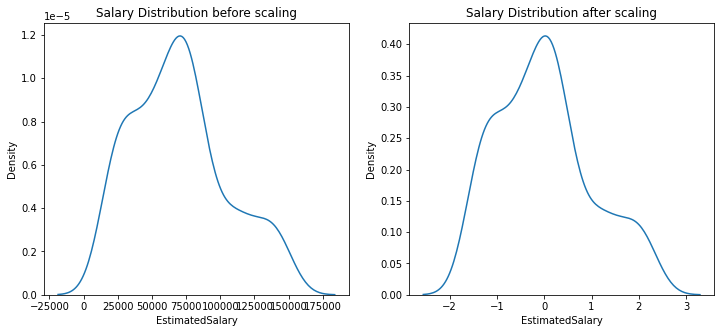

In [25]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('Salary Distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('Salary Distribution after scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()


## Importance of Scaling

## Exprimenting on Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [28]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [29]:
 y_pred = lr.predict(X_test)
 y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


## Exprimenting on DecisionTree

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [35]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [36]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [37]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [39]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


## Now adding Outlier
### In order to check the effect of outlier

In [40]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,35000],'Purchased':[0,1,1]}),ignore_index=True)

In [41]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


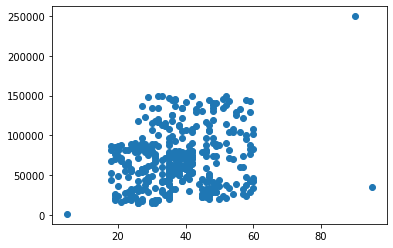

In [43]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased',axis=1),
                                                    df['Purchased'],test_size=0.3,
                                                    random_state=0)
X_train.shape,X_test.shape

((282, 2), (121, 2))

## StandardScaler

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# It will learn the parameter
# Learning on the basis of train data
scaler.fit(X_train)
# Transforming both the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

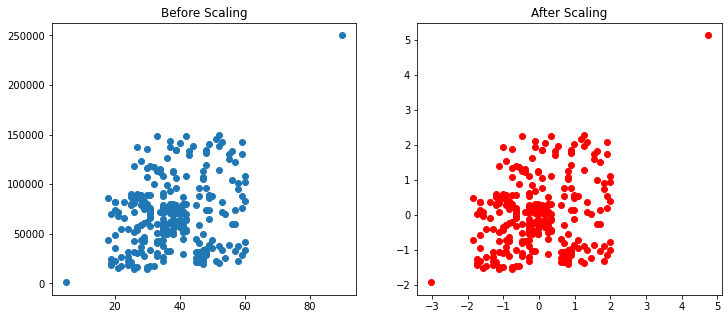

In [47]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))


ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

## Some of the algo on which we use StandardScaler


### * Linear Regression   
### * Logistic Regression

### *   Support Vector Machines (SVM)
### *   k-Nearest Neighbors (k-NN)

### *   Principal Component Analysis (PCA)
### *   Gradient Boosting and XGBoost

### *   Neural Networks














## Some of the algo on which we should not use StandardScaler



### *   Decision Trees
### *   Random Forests

### *   Naive Bayes
### *   K-Means Clustering



